In [ ]:
%cd /content/drive/MyDrive/Business Analytics 2024

/content/drive/MyDrive/Business Analytics 2024


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic = sns.load_dataset('titanic')

survived:

Indicates whether the passenger survived.
Values: 0 (Did not survive), 1 (Survived)
pclass:

Passenger class (socio-economic status).
Values: 1 (First class), 2 (Second class), 3 (Third class)
sex:

The gender of the passenger.
Values: male, female
age:

The age of the passenger.
Numerical values, with some missing as NaN.
sibsp:

Number of siblings or spouses aboard.
Numerical values.
parch:

Number of parents or children aboard.
Numerical values.
fare:

The fare paid by the passenger.
Numerical values (in pounds).
embarked:

Port where the passenger boarded.
Values: C (Cherbourg), Q (Queenstown), S (Southampton)
class:

A categorical version of pclass.
Values: First, Second, Third
who:

Describes the type of person (based on gender and age).
Values: man, woman, child
adult_male:

Boolean indicating if the passenger is an adult male.
Values: True, False
deck:

The deck of the passenger's cabin.
Values: A, B, C, D, E, F, G, NaN (missing data)
embark_town:

The town where the passenger boarded.
Values: Cherbourg, Queenstown, Southampton
alive:

Whether the passenger survived (categorical version of survived).
Values: yes, no
alone:

Boolean indicating if the passenger was traveling alone.
Values: True, False

In [ ]:
print(titanic.shape)

(891, 15)


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic = titanic.dropna(subset=['embarked'])
print(titanic.shape)

(889, 15)


In [ ]:
titanic = titanic.dropna(subset=['embark_town'])
print(titanic.shape)

(889, 15)


In [ ]:
titanic.drop(['deck'], inplace=True, axis=1)


In [ ]:
print(titanic.shape)

(889, 14)


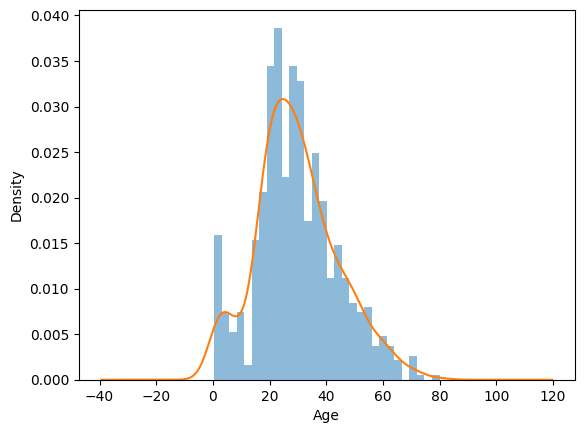

In [ ]:
titanic['age'].hist(grid=False, bins=30, density=True, alpha=0.5)
titanic['age'].plot(kind='density')
plt.xlabel('Age')
plt.show()


In [ ]:
titanic['survived'].value_counts()

,count
survived,
0,549
1,340


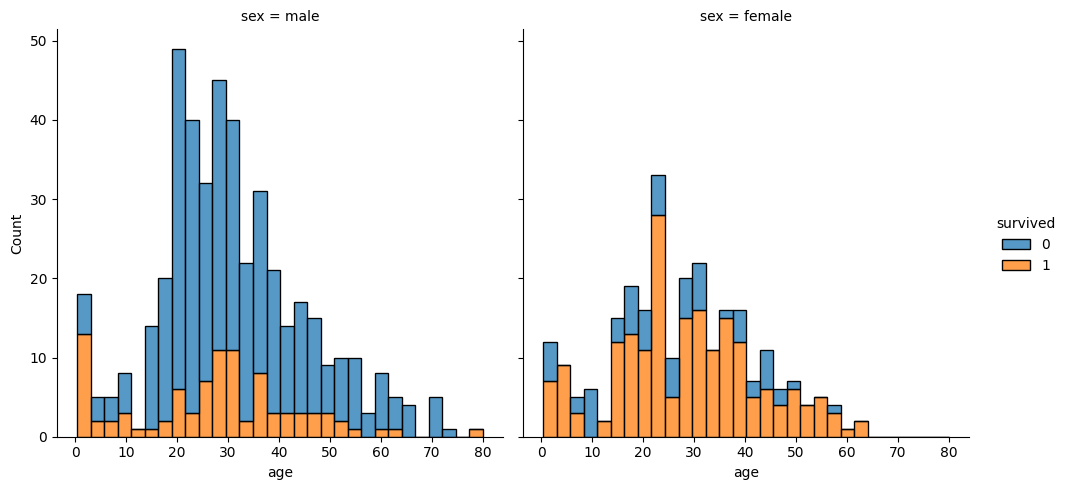

In [ ]:
sns.displot(data=titanic,x='age', bins=30, hue='survived', multiple='stack', col='sex') #KDE (Kernel Density Estimate)

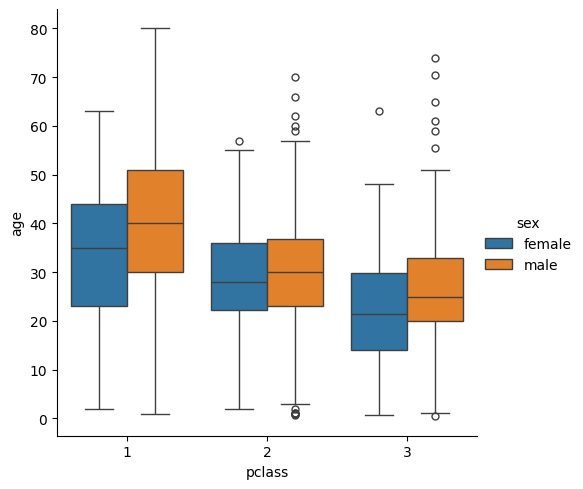

In [ ]:
sns.catplot(data=titanic,x='pclass', y='age', hue='sex', kind='box')

In [ ]:
# Impute missing values with the mean
titanic['age'].fillna(titanic['age'].mean(), inplace=True)


We can improve our models by imputing values more accurately. Instead of simply imputing the mean for missing values, we can use the median for specific subgroups, such as age based on pclass and sex.

In [ ]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.642093,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [ ]:
titanic.drop(['sex','adult_male','embark_town','alive','class'], inplace=True, axis=1)

In [ ]:
titanic = pd.get_dummies(titanic, columns=['embarked', 'who'], drop_first=True)

In [ ]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,who_man,who_woman
0,0,3,22.0,1,0,7.2500,False,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,True,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,True
4,0,3,35.0,0,0,8.0500,True,False,True,True,False


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
alone,0
embarked_Q,0
embarked_S,0
who_man,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (711, 10)
Test set size: (178, 10)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 4: Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Step 5: Fit the model to the training data
model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

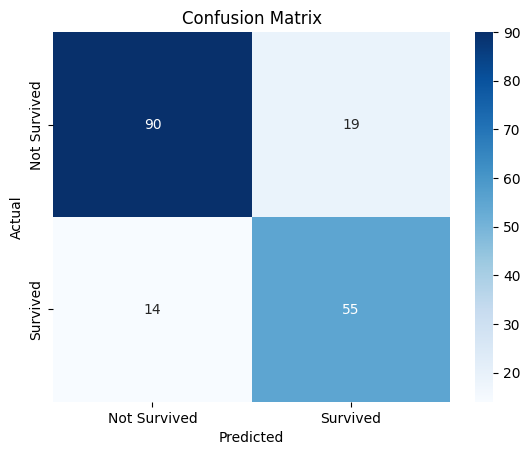

In [ ]:
#import library for confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualize the confusion matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Step 8: Get a more detailed classification report
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.8146067415730337
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.74      0.80      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178

